In [47]:
import seml
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from lataq.metrics.metrics import metrics
#from lataq_reproduce.exp_dict import EXPERIMENT_INFO

plt.rcParams['figure.dpi'] = 300
plt.rcParams['axes.facecolor'] = (1,1,1,0)

# Get results for SCANVI, SCVI, MARS, SVM

In [38]:
results = seml.get_results('scpoli.stability', to_data_frame=True)

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

In [40]:
for score in list(results['result.integration_scores'].loc[0].columns):
    results[f'result.{score}'] = results['result.integration_scores'].apply(
        lambda x: x[score]
    )
results['result.f1-score-macro'] = results['result.classification_report_query'].apply(
    lambda x: x.loc['macro avg']['f1-score']
)
results['result.f1-score-weighted'] = results['result.classification_report_query'].apply(
    lambda x: x.loc['weighted avg']['f1-score']
)
results['result.accuracy'] = results['result.classification_report_query'].apply(
    lambda x: x.loc['accuracy']['f1-score']
)
results = results[[
    'config.data',
    'config.n_obs',
    'config.run',
    'result.n_obs',
    'result.NMI_cluster/label',
    'result.ARI_cluster/label',
    'result.ASW_label',
    'result.ASW_label/batch',
    'result.PCR_batch',
    'result.isolated_label_F1',
    'result.isolated_label_silhouette',
    'result.graph_conn',
    'result.f1-score-macro',
    'result.f1-score-weighted',
    'result.accuracy'
]]

In [41]:
results['integration_scores_mean'] = results[[
    'result.NMI_cluster/label',
    'result.ARI_cluster/label',
    'result.ASW_label',
    'result.ASW_label/batch',
    'result.PCR_batch',
    'result.isolated_label_F1',
    'result.isolated_label_silhouette',
    'result.graph_conn',
]].mean(axis=1)

/tmp/ipykernel_13520/1549523270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['integration_scores_mean'] = results[[


In [42]:
results_pbmc = results[results['config.data'] == 'pbmc']

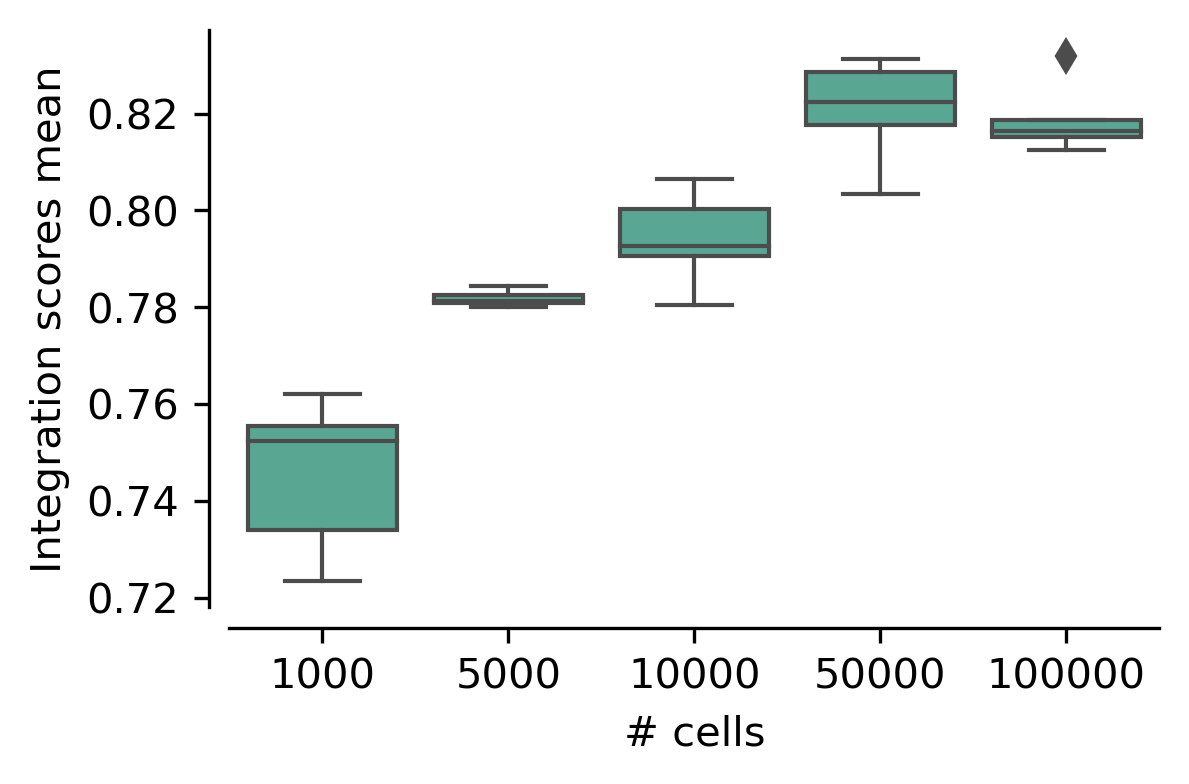

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(4, 2.5))
sns.boxplot(
    x='config.n_obs', 
    y='integration_scores_mean',
    #hue='config.data', 
    data=results_pbmc,
    ax=ax,
    linewidth=1,
    color="#4CB399",
)
ax.set_ylabel("Integration scores mean")
ax.set_xlabel("# cells")
sns.despine(offset=5)

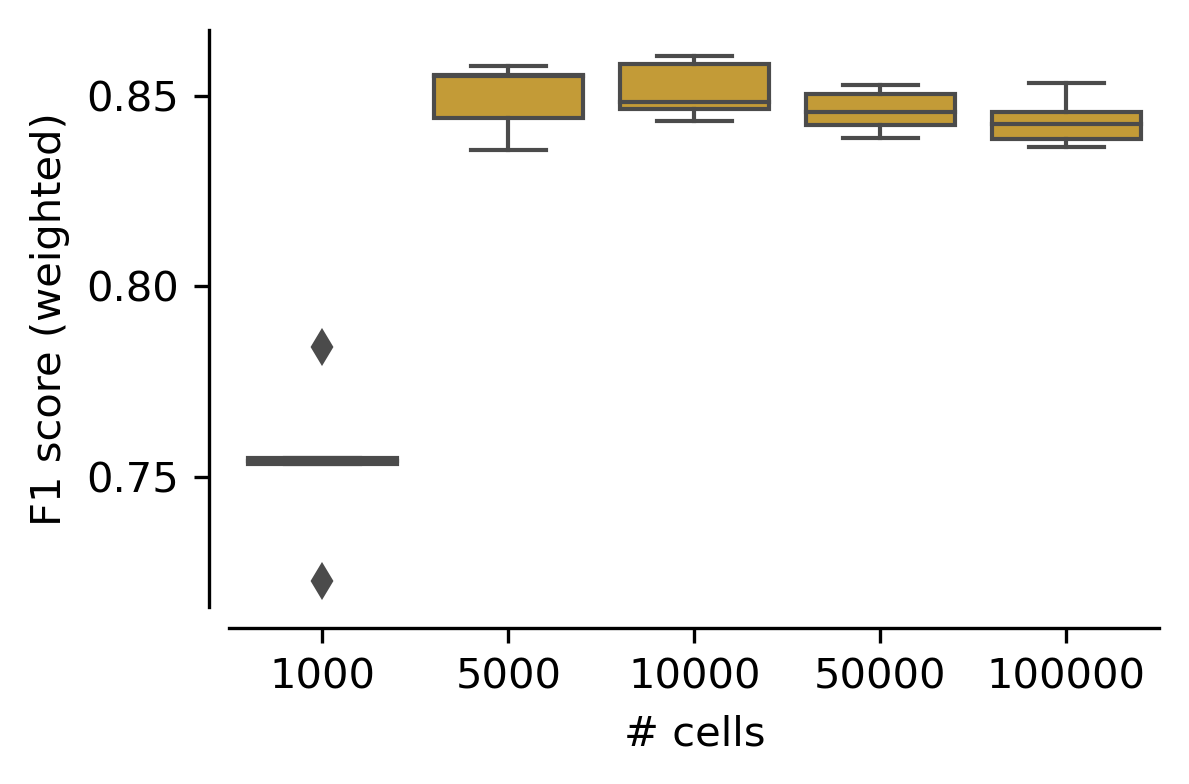

In [78]:
fig, ax = plt.subplots(1, 1, figsize=(4, 2.5))
sns.boxplot(
    x='config.n_obs', 
    y='result.f1-score-weighted',
    #hue='config.data', 
    data=results_pbmc,
    ax=ax,
    linewidth=1,
    color='#DAA520',
)
ax.set_ylabel("F1 score (weighted)")
ax.set_xlabel("# cells")
sns.despine(offset=5)